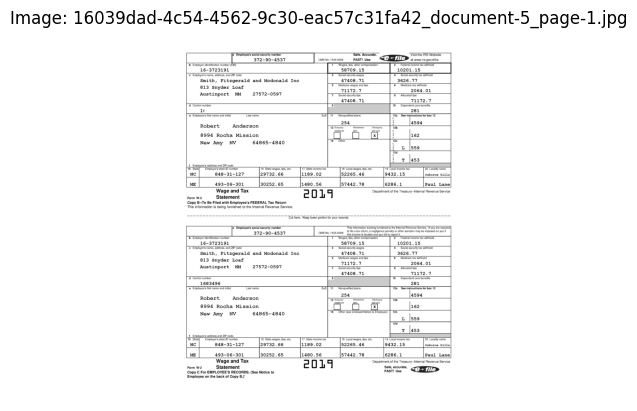

TSV File: 16039dad-4c54-4562-9c30-eac57c31fa42_document-5_page-1.tsv
                         39,39,503,198,524,228,a,OTHER
0               41,50,538,196,672,230,Employee's,OTHER
1                   52,57,676,196,747,231,social,OTHER
2                 59,66,752,196,845,231,security,OTHER
3                   68,73,850,196,933,230,number,OTHER
4              129,133,1586,193,1653,228,"Safe,",OTHER
5            135,143,1659,196,1794,233,Accurate.,OTHER
6                163,167,2090,194,2147,228,Visit,OTHER
7                  169,171,2153,195,2197,229,the,OTHER
8                  173,175,2203,195,2253,230,IRS,OTHER
9              177,183,2259,193,2366,232,Website,OTHER
10   240,250,697,236,979,277,372-90-4537,ssnOfEmployee
11                 334,336,1832,218,1946,263,Rev,OTHER
12                338,341,1954,220,2045,263,file,OTHER
13                 447,449,1273,241,1326,273,OMB,OTHER
14                 451,453,1331,242,1372,273,No.,OTHER
15           455,463,1377,241,1492,274,1545-0008,OT

In [4]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

class ImageTSVViewer:
    def __init__(self, images_folder, tsv_folder):
        # Paths to the folders
        self.images_folder = images_folder
        self.tsv_folder = tsv_folder

        # Get the list of image and TSV filenames sorted
        self.image_files = sorted([f for f in os.listdir(images_folder) if f.endswith('.jpg')])
        self.tsv_files = sorted([f for f in os.listdir(tsv_folder) if f.endswith('.tsv')])

        # Ensure that the number of images and TSV files match
        if len(self.image_files) != len(self.tsv_files):
            raise ValueError("Mismatch between the number of images and TSV files.")

    def __getitem__(self, index):
        # Check if the index is within bounds
        if index < 0 or index >= len(self.image_files):
            raise IndexError("Index out of range.")

        # Get the image and TSV filenames
        img_file = self.image_files[index]
        tsv_file = self.tsv_files[index]

        # Load the image
        img_path = os.path.join(self.images_folder, img_file)
        img = Image.open(img_path)

        # Load the TSV file
        tsv_path = os.path.join(self.tsv_folder, tsv_file)
        df = pd.read_csv(tsv_path, sep='\t')

        # Return the image and TSV data
        return img, df

    def display(self, index):
        # Get the image and TSV data for the given index
        img, df = self[index]

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image: {self.image_files[index]}")
        plt.show()

        # Display the TSV data
        print(f"TSV File: {self.tsv_files[index]}")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(df)

# Paths to the folders
images_folder = 'train/images'
tsv_folder = 'train/boxes_transcripts_labels'

# Create the viewer object
viewer = ImageTSVViewer(images_folder, tsv_folder)

# Example usage: Display the 0th image and its TSV file
viewer.display(34)  # This will display the 0th image and TSV file


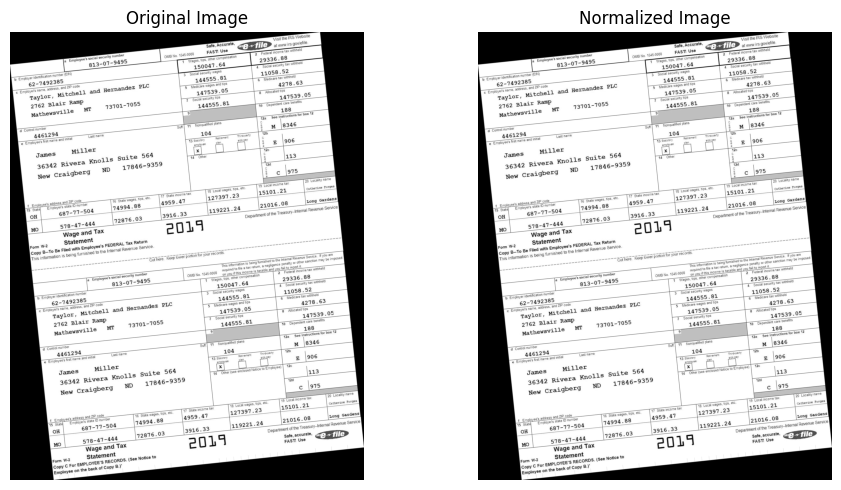

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = '/home/aswin/Desktop/Infrrd/train/images/3cfcc912-7587-4c89-8b2f-b0b573abf658_document-9_page-1.jpg'  # Replace with your image path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale mode

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Display the original image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Normalize the image
norm_img = np.zeros((img.shape[0], img.shape[1]))
img_normalized = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

# Display the normalized image
plt.subplot(1, 2, 2)
plt.imshow(img_normalized, cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

# Show both images
plt.tight_layout()
plt.show()


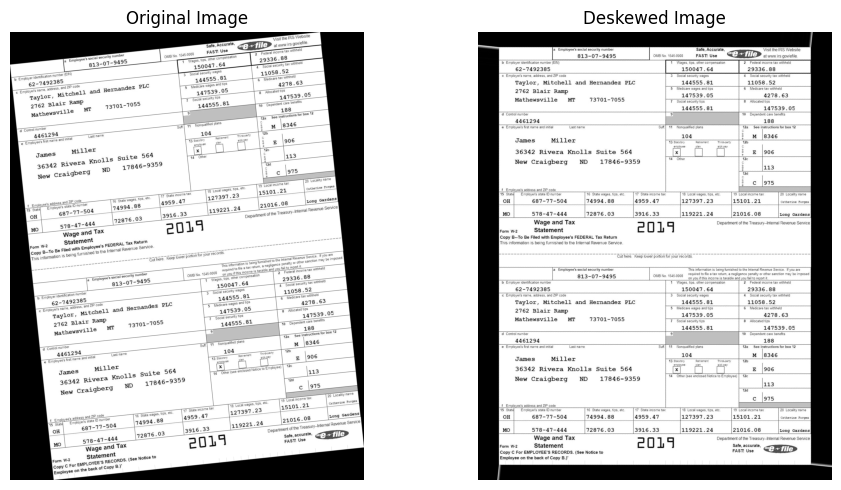

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def deskew(image):
    # Find coordinates of all non-zero pixels in the image
    co_ords = np.column_stack(np.where(image > 0))
    
    # Calculate the minimum area rectangle and get the angle of rotation
    angle = cv2.minAreaRect(co_ords)[-1]
    
    # Adjust the angle to correct the skew
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    # Get the image dimensions
    (h, w) = image.shape[:2]
    
    # Calculate the center of the image
    center = (w // 2, h // 2)
    
    # Get the rotation matrix for deskewing
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Rotate the image to deskew it
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

# Load the image using OpenCV (grayscale mode)
img_path = '/home/aswin/Desktop/Infrrd/train/images/3cfcc912-7587-4c89-8b2f-b0b573abf658_document-9_page-1.jpg'  # Replace with the actual path to your image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Perform the deskew operation
deskewed_img = deskew(img)

# Display the original and deskewed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deskewed_img, cmap='gray')
plt.title('Deskewed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


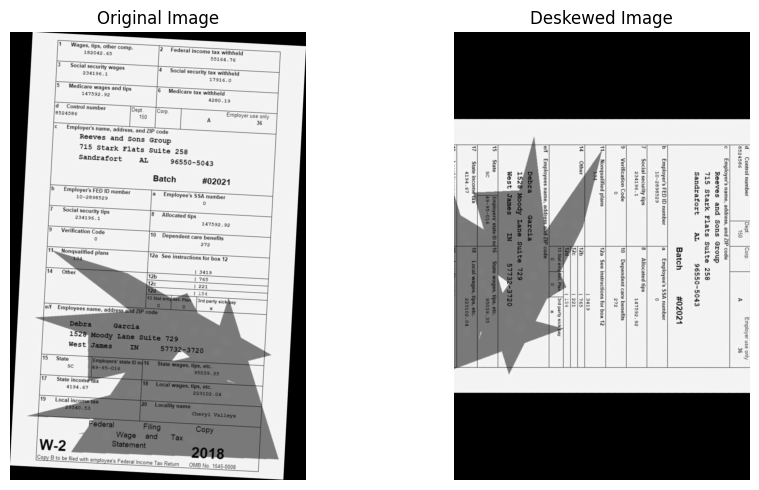

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def deskew(image):
    # Find coordinates of all non-zero pixels in the image
    co_ords = np.column_stack(np.where(image > 0))
    
    # Calculate the minimum area rectangle and get the angle of rotation
    angle = cv2.minAreaRect(co_ords)[-1]
    
    # Adjust the angle to correct the skew
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    # Get the image dimensions
    (h, w) = image.shape[:2]
    
    # Calculate the center of the image
    center = (w // 2, h // 2)
    
    # Get the rotation matrix for deskewing
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Rotate the image to deskew it
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

# Load the image using OpenCV (grayscale mode)
#img_path = '/home/aswin/Desktop/Infrrd/train/images/7dd13ad2-a479-434a-b92b-aae74336f438_document-6_page-1.jpg'
#img_path = "/home/aswin/Desktop/Infrrd/train/images/f708389b-f475-4c7a-8a6f-7afdc590a2bb_document-4_page-1.jpg"
img_path = "/home/aswin/Desktop/Infrrd/train/images/fcdd2c05-c5ae-41cb-a262-4dbbd53f139b_document-7_page-1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Perform the deskew operation
deskewed_img = deskew(img)

# Display the original and deskewed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deskewed_img, cmap='gray')
plt.title('Deskewed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


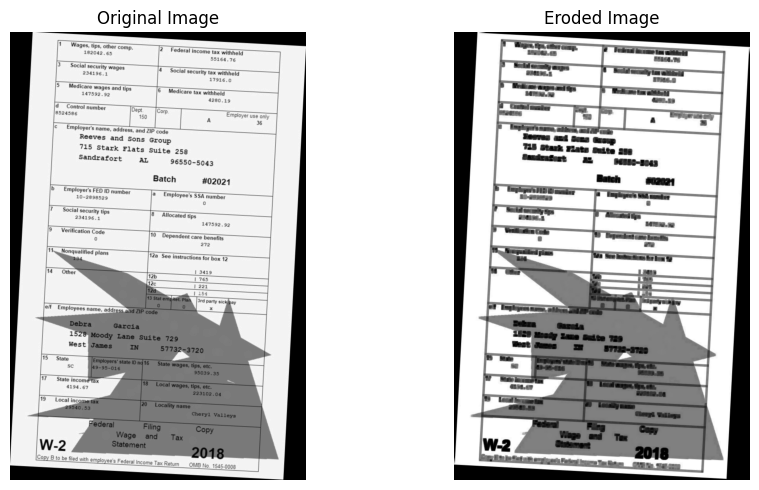

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
#img_path = 'j.png'  # Replace with your image path
img_path = "/home/aswin/Desktop/Infrrd/train/images/fcdd2c05-c5ae-41cb-a262-4dbbd53f139b_document-7_page-1.jpg"
img = cv2.imread(img_path, 0)  # Load in grayscale

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Create a 5x5 kernel of ones for erosion
kernel = np.ones((5, 5), np.uint8)

# Perform the erosion operation
erosion = cv2.erode(img, kernel, iterations=1)

# Display the original and eroded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


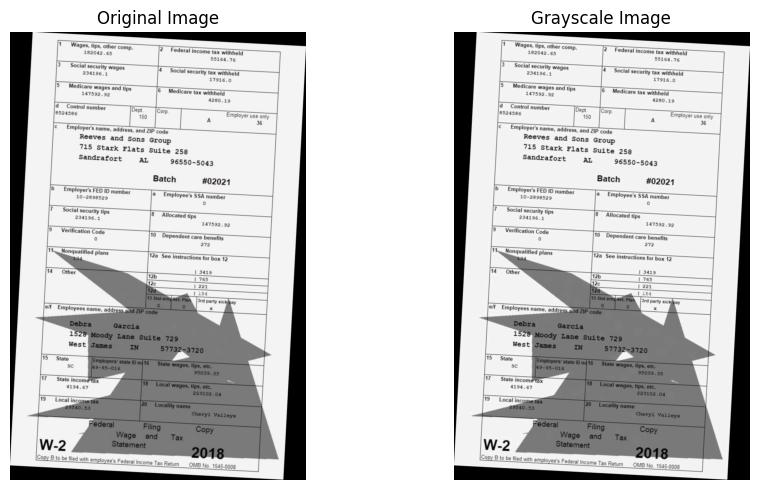

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_grayscale(image):
    # Convert the image to grayscale
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load the image using OpenCV
img_path = "/home/aswin/Desktop/Infrrd/train/images/fcdd2c05-c5ae-41cb-a262-4dbbd53f139b_document-7_page-1.jpg"
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Convert the image to grayscale using the get_grayscale function
grayscale_img = get_grayscale(img)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Displaying the original image in RGB
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_img, cmap='gray')  # Displaying the grayscale image
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()


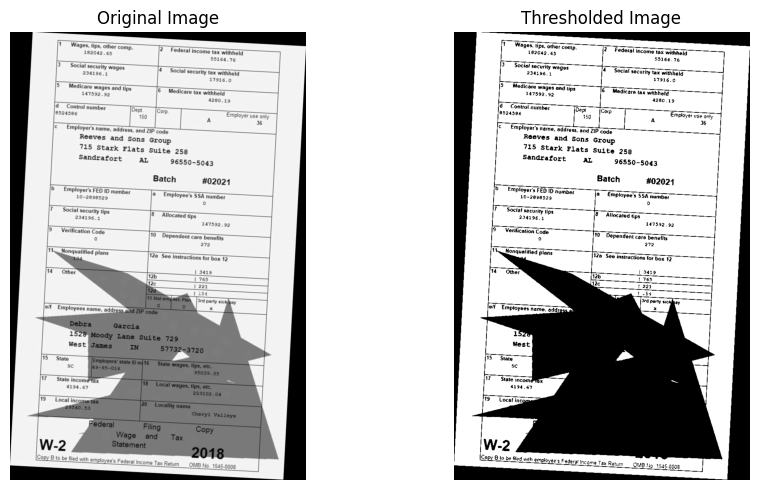

In [5]:
import cv2
import matplotlib.pyplot as plt

def thresholding(image):
    # Apply Otsu's thresholding
    _, thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_img

# Load the image in grayscale mode
#img_path = "/path/to/your/image.jpg"  # Replace with your actual image path
img_path = "/home/aswin/Desktop/Infrrd/train/images/fcdd2c05-c5ae-41cb-a262-4dbbd53f139b_document-7_page-1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load the image.")
    exit()

# Apply thresholding
thresh_img = thresholding(img)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


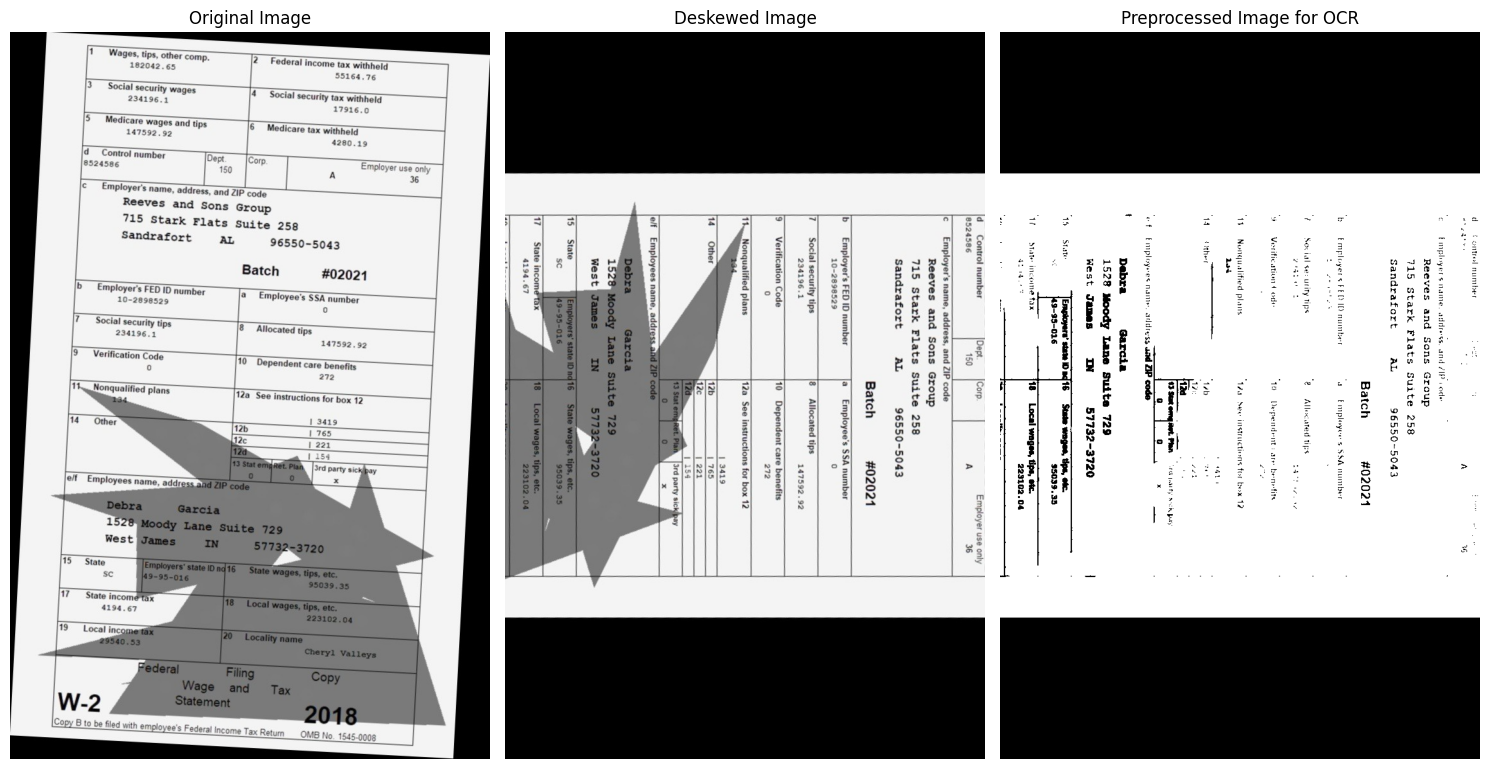

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def deskew(image):
    # Convert to binary image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Find coordinates of all non-zero pixels
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # Correct the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

def preprocess_for_ocr(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Deskew the image
    deskewed = deskew(image)

    # Convert to grayscale
    gray = cv2.cvtColor(deskewed, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Remove noise using morphological operations (optional)
    kernel = np.ones((1, 1), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

    # Display results
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(deskewed, cv2.COLOR_BGR2RGB))
    plt.title('Deskewed Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cleaned, cmap='gray')
    plt.title('Preprocessed Image for OCR')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return cleaned

# Path to your image file
img_path = "/home/aswin/Desktop/Infrrd/train/images/fcdd2c05-c5ae-41cb-a262-4dbbd53f139b_document-7_page-1.jpg"
preprocessed_image = preprocess_for_ocr(img_path)

# Save the preprocessed image if needed
#cv2.imwrite('/mnt/data/preprocessed_image.jpg', preprocessed_image)
